In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import datetime
import csv
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from keras.models import load_model

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def read_csv(file_path):
    data = list()
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)
        for raw in reader:
            data.append([float(i) for i in raw])
    return data

def split_dataset(data, per):
    total_num = len(data)
    test_num = total_num * per // 100
    train_data = data[0:(total_num - test_num)]
    test_data = data[(total_num - test_num):]
    return train_data, test_data

In [ ]:
ph = [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12]
ph_mse_data = [[] for _ in range(len(ph))]
ph_networks = [['/content/drive/My Drive/mlp_model.h5', "/content/drive/My Drive/simple_rnn_model.h5", "/content/drive/My Drive/lstm_model.h5"],
['/content/drive/My Drive/mlp_model2.h5', "/content/drive/My Drive/simple_rnn_model2.h5", "/content/drive/My Drive/lstm_model2.h5"],
['/content/drive/My Drive/mlp_model3.h5', "/content/drive/My Drive/simple_rnn_model3.h5", "/content/drive/My Drive/lstm_model3.h5"],
['/content/drive/My Drive/mlp_model4.h5', "/content/drive/My Drive/simple_rnn_model4.h5", "/content/drive/My Drive/lstm_model4.h5"],
['/content/drive/My Drive/mlp_model6.h5', "/content/drive/My Drive/simple_rnn_model6.h5", "/content/drive/My Drive/lstm_model6.h5"],
['/content/drive/My Drive/mlp_model7.h5', "/content/drive/My Drive/simple_rnn_model7.h5", "/content/drive/My Drive/lstm_model7.h5"],
['/content/drive/My Drive/mlp_model8.h5', "/content/drive/My Drive/simple_rnn_model8.h5", "/content/drive/My Drive/lstm_model8.h5"],
['/content/drive/My Drive/mlp_model9.h5', "/content/drive/My Drive/simple_rnn_model9.h5", "/content/drive/My Drive/lstm_model9.h5"],
['/content/drive/My Drive/mlp_model10.h5', "/content/drive/My Drive/simple_rnn_model10.h5", "/content/drive/My Drive/lstm_model10.h5"],
['/content/drive/My Drive/mlp_model11.h5', "/content/drive/My Drive/simple_rnn_model11.h5", "/content/drive/My Drive/lstm_model11.h5"],
['/content/drive/My Drive/mlp_model12.h5', "/content/drive/My Drive/simple_rnn_model12.h5", "/content/drive/My Drive/lstm_model12.h5"]]
print(ph)
print(ph[3])
#ph1_networks = ['Paper\\Networks\\mlp_model.h5', "Paper\\Networks\\simple_rnn_model.h5", "Paper\\Networks\\lstm_model.h5", "Paper\\Networks\\gru_model.h5"]
#ph5_networks = ['Paper\\Networks\\mlp_model5.h5', "Paper\\Networks\\simple_rnn_model5.h5", "Paper\\Networks\\lstm_model5.h5"]
#ph9_networks = ['Paper\\Networks\\mlp_model9.h5', "Paper\\Networks\\simple_rnn_model9.h5", "Paper\\Networks\\lstm_model9.h5"]

def prepare_data(duration, ph):
    input_data = list()
    output_data = list()
    for j in range(29):
        file_path = f"/content/drive/My Drive/ColabNotebooks/paperwithvedadi/data(10subjects)/filtered/filtered_{j+1}.csv"
        data = read_csv(file_path)
        #num = len (data) - duration - ((1*i)+1)
        num = len (data) - duration - ph
        for k in range(num):
            input_data.append([row for row in data[k:k+duration]])
            #output_data.append(data[j+duration+(1*i)])
            output_data.append(data[k+duration+(ph-1)])
    return np.array(input_data), np.array(output_data)

for j in range(len(ph)):
  input_data, output_data = prepare_data(200//4, ph[j])
  input_data = np.squeeze(input_data)
  train_data, test_data = split_dataset(input_data, 15)
  train_label, test_label = split_dataset(output_data, 15)
  n_timesteps = train_data.shape[1]
  n_features = train_data.shape[2]
  test_data = test_data.reshape(test_data.shape[0], n_timesteps * n_features)
  NewScale = MinMaxScaler(feature_range=(0,1), copy=True)
  test_data = NewScale.fit_transform(test_data)
  test_label = NewScale.fit_transform(test_label)
  test_data = test_data.reshape(test_data.shape[0], n_timesteps, n_features)
  for i in range(len(ph_networks[j])):    
    #test_data, test_label = shuffle(test_data, test_label, random_state=1)

    if i == 0:
      #train_data = train_data.reshape(train_data.shape[0], n_timesteps * n_features)
      test_data = test_data.reshape(test_data.shape[0], n_timesteps * n_features)
    else:
      #train_data = train_data.reshape(train_data.shape[0], n_timesteps, n_features)
      test_data = test_data.reshape(test_data.shape[0], n_timesteps, n_features)

    model = load_model(ph_networks[j][i])
    prediction = model.predict(test_data)
    print("ph = " , j, " network = ", ph_networks[j][i],"   ", np.shape(prediction) )
    mse_data = ((test_label[:, 8] - prediction[:, 8])**2)
    ph_mse_data[j].append(mse_data)

(11,)
[ 1  2  3  4  6  7  8  9 10 11 12]
4
ph1:  (52585, 9)
ph2:  (52585, 9)
ph3:  (52585, 9)
ph4:  (52585, 9)
ph6:  (52585, 9)
ph7:  (52585, 9)
ph8:  (52585, 9)
ph9:  (52585, 9)
ph10:  (52585, 9)
ph11:  (52585, 9)
ph12:  (52585, 9)
ph1:  (52580, 9)
ph2:  (52580, 9)
ph3:  (52580, 9)
ph4:  (52580, 9)
ph6:  (52580, 9)
ph7:  (52580, 9)
ph8:  (52580, 9)
ph9:  (52580, 9)
ph10:  (52580, 9)
ph11:  (52580, 9)
ph12:  (52580, 9)
ph1:  (52576, 9)
ph2:  (52576, 9)
ph3:  (52576, 9)
ph4:  (52576, 9)
ph6:  (52576, 9)
ph7:  (52576, 9)
ph8:  (52576, 9)
ph9:  (52576, 9)
ph10:  (52576, 9)
ph11:  (52576, 9)
ph12:  (52576, 9)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

<function matplotlib.pyplot.show>

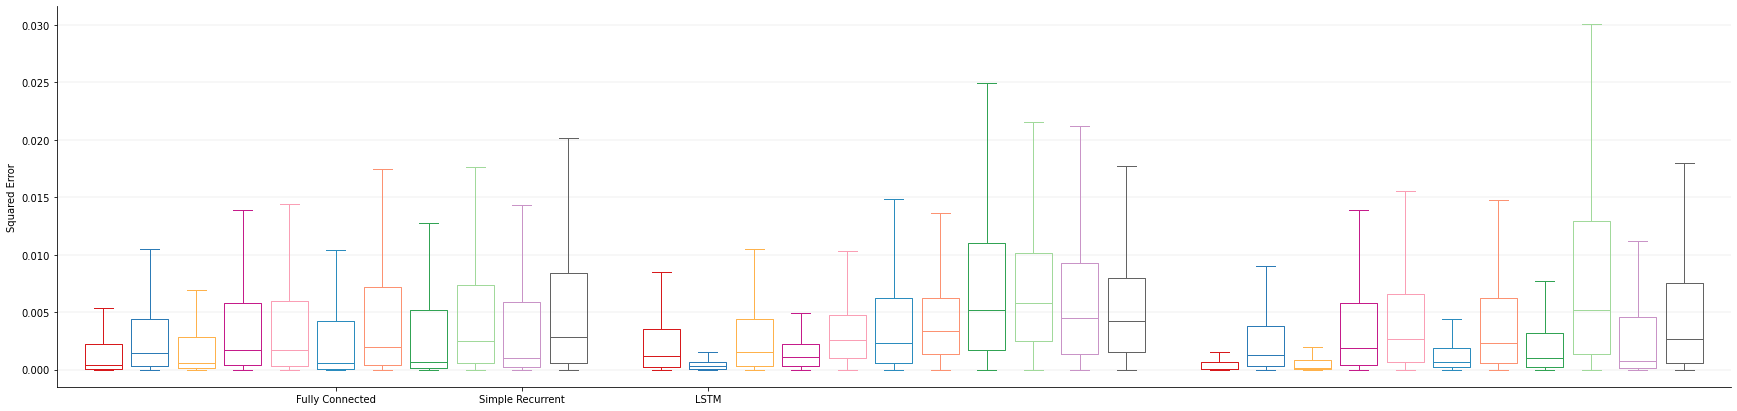

In [ ]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig, ax = plt.subplots(figsize=(30, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Squared Error')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)


#ticks = ['Fully Connected', 'Simple Recurrent', 'LSTM', 'GRU']
ticks = ['Fully Connected', 'Simple Recurrent', 'LSTM']

bp1 = ax.boxplot(ph_mse_data[0], positions=np.array(range(len(ph_mse_data[0])))*6.0-2.5, sym='', widths=0.4, showfliers=True)
bp2 = ax.boxplot(ph_mse_data[1], positions=np.array(range(len(ph_mse_data[1])))*6.0-2.0, sym='', widths=0.4, showfliers=True)
bp3 = ax.boxplot(ph_mse_data[2], positions=np.array(range(len(ph_mse_data[2])))*6.0-1.5, sym='', widths=0.4, showfliers=True)

bp4 = ax.boxplot(ph_mse_data[3], positions=np.array(range(len(ph_mse_data[3])))*6.0-1.0, sym='', widths=0.4, showfliers=True)
bp6 = ax.boxplot(ph_mse_data[4], positions=np.array(range(len(ph_mse_data[4])))*6.0-0.5, sym='', widths=0.4, showfliers=True)
bp7 = ax.boxplot(ph_mse_data[5], positions=np.array(range(len(ph_mse_data[5])))*6.0, sym='', widths=0.4, showfliers=True)
bp8 = ax.boxplot(ph_mse_data[6], positions=np.array(range(len(ph_mse_data[6])))*6.0+0.5, sym='', widths=0.4, showfliers=True)
bp9 = ax.boxplot(ph_mse_data[7], positions=np.array(range(len(ph_mse_data[7])))*6.0+1.0, sym='', widths=0.4, showfliers=True)
bp10 = ax.boxplot(ph_mse_data[8], positions=np.array(range(len(ph_mse_data[8])))*6.0+1.5, sym='', widths=0.4, showfliers=True)
bp11 = ax.boxplot(ph_mse_data[9], positions=np.array(range(len(ph_mse_data[9])))*6.0+2.0, sym='', widths=0.4, showfliers=True)
bp12 = ax.boxplot(ph_mse_data[10], positions=np.array(range(len(ph_mse_data[10])))*6.0+2.5, sym='', widths=0.4, showfliers=True)

plt.xticks(range(0, len(ticks) * 2, 2), ticks)

set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bp2, '#2C7BB6')
set_box_color(bp3, '#feb24c')

set_box_color(bp4, '#c51b8a') # colors are from http://colorbrewer2.org/
set_box_color(bp6, '#fa9fb5')
set_box_color(bp7, '#2b8cbe')
set_box_color(bp8, '#fc9272') # colors are from http://colorbrewer2.org/
set_box_color(bp9, '#31a354')
set_box_color(bp10, '#a1d99b')
set_box_color(bp11, '#c994c7') # colors are from http://colorbrewer2.org/
set_box_color(bp12, '#636363')

plt.plot([], c='#D7191C', label='Prediction Horizon = 1')
plt.plot([], c='#2C7BB6', label='Prediction Horizon = 2')
plt.plot([], c='#feb24c', label='Prediction Horizon = 3')

plt.plot([], c='#c51b8a', label='Prediction Horizon = 4')
plt.plot([], c='#fa9fb5', label='Prediction Horizon = 6')
plt.plot([], c='#2b8cbe', label='Prediction Horizon = 7')
plt.plot([], c='#fc9272', label='Prediction Horizon = 8')
plt.plot([], c='#31a354', label='Prediction Horizon = 9')
plt.plot([], c='#a1d99b', label='Prediction Horizon = 10')
plt.plot([], c='#c994c7', label='Prediction Horizon = 11')
plt.plot([], c='#636363', label='Prediction Horizon = 12')
#plt.legend()

plt.savefig(f'/content/drive/My Drive/ColabNotebooks/paperwithvedadi/SquaredErrorDistribution.png', dpi = 900, bbox_inches='tight')
plt.show

In [ ]:
train_data = train_data.reshape(train_data.shape[0], n_timesteps * n_features)
test_data = test_data.reshape(test_data.shape[0], n_timesteps * n_features)

In [ ]:
train_data = train_data.reshape(train_data.shape[0], n_timesteps , n_features)
test_data = test_data.reshape(test_data.shape[0], n_timesteps , n_features)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from keras.models import load_model

model = load_model("Paper\\Networks\\lstm_model9.h5")

#test_data, test_label = shuffle(test_data, test_label, random_state=1)
start = datetime.datetime.now()
prediction = model.predict(test_data)
end = datetime.datetime.now()
test_time = end - start
test_loss = model.evaluate(test_data, test_label)
mse = mean_squared_error(test_label[:, 8], prediction[:, 8])
r2 = r2_score(test_label[:, 8], prediction[:, 8])

print("test time is : ",test_time)
print('Test - Loss:', test_loss)
print('Test - MSE :', mse)
print('Test - R2 Score :', r2)

1643/1643 [==============================] - 14s 4ms/step - loss: 0.0087
test time is :  0:00:30.904870
Test - Loss: 0.008690599352121353
Test - MSE : 0.0026274563014025525
Test - R2 Score : 0.9670505878088348


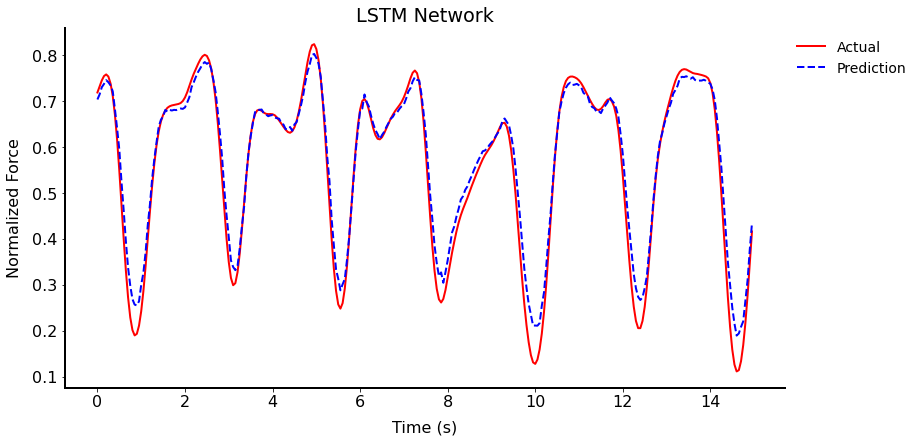

In [ ]:
import matplotlib as mpl
from pylab import cm

#mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('rainbow', 2)

fig = plt.figure(figsize = [10,5])
ax = fig.add_axes([0, 0, 1, 1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

time = np.arange(0, 15, 15/300)
ax.plot(time, test_label[10000:13000:10, 8], label='Actual', linewidth=2, c='r', linestyle='-')
ax.plot(time, prediction[10000:13000:10, 8], label='Prediction', linewidth=2, c='b', linestyle='--')

plt.legend(frameon=False)
ax.set_xlabel('Time (s)', labelpad=10)
ax.set_ylabel('Normalized Force', labelpad=10)
ax.set_title("LSTM Network")
#ax.set_title("Fully Connected Network")
#ax.set_title("Simple Recurrent Network")

ax.legend(bbox_to_anchor=(1, 1), loc=0, frameon=False, fontsize=14)

plt.savefig('Paper\\PerformanceImages\\lstm_prediction9.png', dpi = 900, bbox_inches='tight')

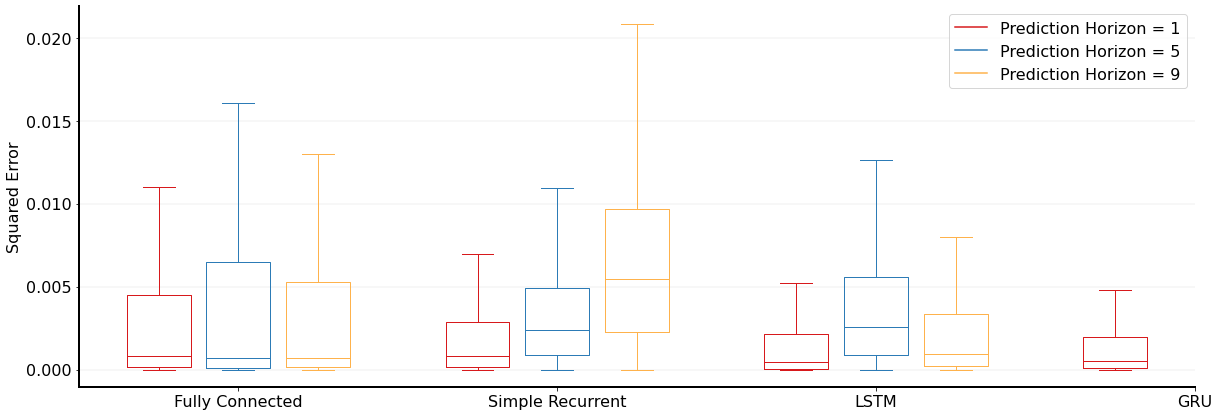